In [1]:
import os
import numpy as np
import efficientnet.tfkeras
from tensorflow.keras.models import load_model
import pandas as pd

os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [2]:
#load mode
model_dir ='/media/tohn/HDD/BearHouse-Person-Model/models/B5R2_Category_500.h5' #แก้
model = load_model(model_dir)
height = width = model.input_shape[1]

In [3]:
#Train
dataframe = pd.read_csv('/home/yupaporn/codes/EffNet-Person-Classify/data_label_by_tan_09102023_splited_imgpath29_train_middleframe.csv') #แก้ data เปลี่ยนตาม fold
base_dir = '/media/tohn/HDD/BearHouse-Person-Data/data_R3_middleframe/' #เปลี่ยนตาม fold
dataframe = dataframe[dataframe['category'] != 'Children']
os.chdir(base_dir)
train_dir = os.path.join(base_dir, 'train')

#validation
valframe = pd.read_csv('/home/yupaporn/codes/EffNet-Person-Classify/data_label_by_tan_09102023_splited_imgpath29_val_middleframe.csv') #เปลี่ยนตาม fold
valframe = valframe[valframe['category'] != 'Children']
validation_dir = os.path.join(base_dir, 'validation')

In [4]:
batch_size = 1
epochs = 10

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.2,
      height_shift_range=0.2,
      brightness_range=[0.5,1.5],
      shear_range=0.4,
      zoom_range=0.2,
      horizontal_flip=False,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
        dataframe = dataframe,
        directory = train_dir,
        x_col = 'img_28_train',
        y_col = 'category',
        target_size = (height, width),
        batch_size=batch_size,
        color_mode= 'rgb',
        class_mode='categorical')
test_generator = test_datagen.flow_from_dataframe(
        dataframe = valframe,
        directory = validation_dir,
        x_col = 'img_28_train',
        y_col = 'category',
        target_size = (height, width),
        batch_size=batch_size,
        color_mode= 'rgb',
        class_mode='categorical')

#label
labels = (train_generator.class_indices)
labels = dict((v,k.replace("C","")) for k,v in labels.items())
print(labels)

Found 2679 validated image filenames belonging to 3 classes.
Found 657 validated image filenames belonging to 3 classes.
{0: 'Student', 1: 'Working', 2: 'motorcycle'}


In [5]:
# labels = dict({0: 'Men', 1: 'Women', 2: 'motorcycle'})
# labels

# Select Data

In [6]:
import pandas as pd
# df0 = pd.read_csv (r'/home/yupaporn/codes/USAI/Testdf.csv')
df0 = pd.read_csv('/home/yupaporn/codes/EffNet-Person-Classify/data_label_by_tan_09102023_splited_imgpath29_val_middleframe.csv') 
dataframe = df0[df0['category']!='Children']
# print(df0 .shape)
print(dataframe.shape)
print('Men: ',dataframe[dataframe['gender']=='Men'].shape)
print('Women: ',dataframe[dataframe['gender']=='Women'].shape)
print('motorcycle: ',dataframe[dataframe['gender']=='motorcycle'].shape)
dataframe.head(5)

(657, 19)
Men:  (253, 19)
Women:  (294, 19)
motorcycle:  (110, 19)


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,path_img,img_no,branch,Path_folder_web,camera_angle,gender,category,work_by,status,clip_from,split,path_img_28,path_img_28_train,img_28_train,path_img_29
0,0,14662,71669,2,/media/hdd/tan/code/Show-Images/static/BearHou...,62,Camera17,BearHouse-Person/IP Camera17_kku2_kku2_2023061...,kku2,Men,Working,Yoke,NaN,Bear-House,val,/media/HDD/BearHouse-Person/IP Camera17_kku2_k...,/media/HDD/BearHouse-Person-Data/data_R3_middl...,0_20436.jpg,/media/tohn/HDD/BearHouse-Person/IP Camera17_k...
1,1,25751,129508,27,/media/hdd/tan/code/Show-Images/static/BearHou...,37,Fashion,BearHouse-Person/Fashion_ch3_20230310145957_20...,ch3,Women,Working,Nat,NaN,Bear-House,val,/media/HDD/BearHouse-Person/Fashion_ch3_202303...,/media/HDD/BearHouse-Person-Data/data_R3_middl...,1_261.jpg,/media/tohn/HDD/BearHouse-Person/Fashion_ch3_2...
2,2,28131,141427,40,/media/hdd/tan/code/Show-Images/static/BearHou...,27,Camera17,BearHouse-Person/IP Camera17_kku2_kku2_2023061...,kku2,motorcycle,motorcycle,Frist,NaN,Bear-House,val,/media/HDD/BearHouse-Person/IP Camera17_kku2_k...,/media/HDD/BearHouse-Person-Data/data_R3_middl...,2_16310.jpg,/media/tohn/HDD/BearHouse-Person/IP Camera17_k...
3,3,7659,34029,93,/media/hdd/tan/code/Show-Images/static/BearHou...,53,Camera16,BearHouse-Person/IP Camera16_kku2_kku2_2023061...,kku2,Men,Working,Yoke,NaN,Bear-House,val,/media/HDD/BearHouse-Person/IP Camera16_kku2_k...,/media/HDD/BearHouse-Person-Data/data_R3_middl...,3_25440.jpg,/media/tohn/HDD/BearHouse-Person/IP Camera16_k...
4,4,21118,104844,3,/media/hdd/tan/code/Show-Images/static/BearHou...,22,mega,BearHouse-Person/mega_ch3_20230310115956_20230...,ch3,Women,Working,Yoke,NaN,Bear-House,val,/media/HDD/BearHouse-Person/mega_ch3_202303101...,/media/HDD/BearHouse-Person-Data/data_R3_middl...,4_9578.jpg,/media/tohn/HDD/BearHouse-Person/mega_ch3_2023...


# Prediction

In [7]:
base_dir = '/media/tohn/HDD/BearHouse-Person-Data/data_R3_middleframe/validation'
os.chdir(base_dir)

In [8]:
from tensorflow.keras.preprocessing import image
def predict_image(img_path):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width))
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)
    # Reshape
    x = x.reshape((1,) + x.shape)
    x /= 255.
    result = model.predict([x])
    
    return result[0]

# Predict
pred_list = list()
prob_list = list()
img_path=dataframe['img_28_train'].tolist()
for i in range(0,len(img_path)):
    predict = predict_image(img_path[i])
    result = np.argmax(predict)
    pred_list.append(labels[result])
    prob_list.append(predict[result])

dataframe['Category'] = pred_list
dataframe['Prob'] = prob_list

# Visualization

In [9]:
data_train = dataframe
#เช็คคลาสใน Predicted
pred_class = set(data_train['Category'])
print('Predicted : ',len(pred_class))
print(pred_class)
#เช็คคลาสใน Actual
classe = set(data_train['category'])
print('Actual : ',len(classe))
print(classe)

Predicted :  3
{'motorcycle', 'Working', 'Student'}
Actual :  3
{'motorcycle', 'Working', 'Student'}


In [10]:
import numpy as np
from sklearn.metrics import confusion_matrix
act = data_train['category'].array
pred = data_train['Category'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 96.9558599695586%
              precision    recall  f1-score   support

     Student       0.96      0.96      0.96       169
     Working       0.97      0.97      0.97       378
  motorcycle       0.97      0.96      0.97       110

    accuracy                           0.97       657
   macro avg       0.97      0.97      0.97       657
weighted avg       0.97      0.97      0.97       657



# Confusion matrix

Text(0.5, 21.5, 'Predicted label')

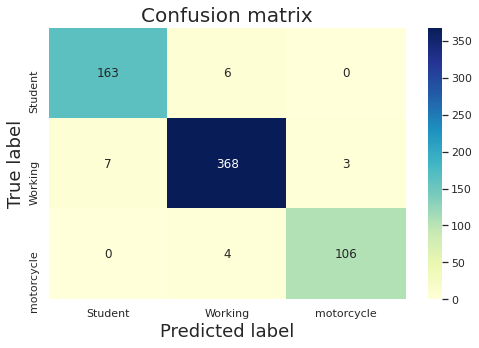

In [11]:
#create CF 
data = {'Actual': act,'Predicted' : pred,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)